In [36]:
import os
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [37]:
mvl = pd.read_csv('/home/rjsietsma/PycharmProjects/capice_updatr/datafiles/Thresholds/VKGL_sept2021_Groningen_withlabels_capice.csv.gz')
mvl.drop(columns='review', inplace=True)
mvl

,GeneName,FeatureID,Consequence,probabilities,chr,pos,ref,alt,class,binarized_label
0,ISG15,ENST00000379389,STOP_GAINED,0.047104,1,949682,A,T,P,1.0
1,AGRN,ENST00000379370,SPLICE_SITE,0.000006,1,977330,T,C,B,0.0
2,AGRN,ENST00000379370,SYNONYMOUS,0.000001,1,981931,A,G,B,0.0
3,AGRN,ENST00000379370,INTRONIC,0.000005,1,982941,T,C,B,0.0
4,AGRN,ENST00000379370,SYNONYMOUS,0.000153,1,982994,T,C,B,0.0
...,...,...,...,...,...,...,...,...,...,...
20218,RAB39B,ENST00000369454,SYNONYMOUS,0.000022,X,154490187,T,C,LB,0.0
20219,CLIC2,ENST00000369449,NON_SYNONYMOUS,0.001572,X,154563706,C,T,VUS,NaN
20220,TMLHE,ENST00000334398,NON_SYNONYMOUS,0.000948,X,154736715,T,C,VUS,NaN
20221,TMLHE,ENST00000334398,NON_SYNONYMOUS,0.002784,X,154743837,T,A,LB,0.0


In [38]:
thresholds = pd.read_csv('/home/rjsietsma/PycharmProjects/capice_updatr/datafiles/Thresholds/ppv_tracking_dataframe_v2.tsv.gz', sep='\t', decimal=',')
thresholds

,gene,n_benign,n_pathogenic,n_total,optimal_threshold,ppv,npv,sensitivity,discrepancies,false_positives
0,SKI,2,1,3,0.982573,1.000000,1.000000,1.000000,0,0
1,CAMTA1,10,2,12,0.773537,1.000000,1.000000,1.000000,0,0
2,MTHFR,8,4,12,0.316441,1.000000,1.000000,1.000000,0,0
3,HSPG2,24,1,25,0.973380,1.000000,1.000000,1.000000,0,0
4,LDLRAP1,3,1,4,0.097298,1.000000,1.000000,1.000000,0,0
...,...,...,...,...,...,...,...,...,...,...
3909,XPC,1,2,3,0.931200,1.000000,1.000000,1.000000,0,0
3910,GLB1,6,3,9,0.625156,1.000000,1.000000,1.000000,0,0
3911,CRTAP,4,2,6,0.076285,1.000000,1.000000,1.000000,0,0
3912,SCN5A,60,14,74,0.051344,0.722222,0.982143,0.928571,1,5


In [39]:
mvl['sugg_class'] = 'VUS'

In [40]:
for gene in thresholds['gene'].unique():
    if math.isnan(thresholds[thresholds['gene'] == gene]['optimal_threshold']):
        continue
    threshold = thresholds[thresholds['gene'] == gene]['optimal_threshold'].values[0]
    mvl.loc[mvl[(mvl['GeneName'] == gene) & (mvl['probabilities'] >= threshold)].index, 'sugg_class'] = 'LP'
    mvl.loc[mvl[(mvl['GeneName'] == gene) & (mvl['probabilities'] < threshold)].index, 'sugg_class'] = 'LB'
mvl

,GeneName,FeatureID,Consequence,probabilities,chr,pos,ref,alt,class,binarized_label,sugg_class
0,ISG15,ENST00000379389,STOP_GAINED,0.047104,1,949682,A,T,P,1.0,VUS
1,AGRN,ENST00000379370,SPLICE_SITE,0.000006,1,977330,T,C,B,0.0,VUS
2,AGRN,ENST00000379370,SYNONYMOUS,0.000001,1,981931,A,G,B,0.0,VUS
3,AGRN,ENST00000379370,INTRONIC,0.000005,1,982941,T,C,B,0.0,VUS
4,AGRN,ENST00000379370,SYNONYMOUS,0.000153,1,982994,T,C,B,0.0,VUS
...,...,...,...,...,...,...,...,...,...,...,...
20218,RAB39B,ENST00000369454,SYNONYMOUS,0.000022,X,154490187,T,C,LB,0.0,LB
20219,CLIC2,ENST00000369449,NON_SYNONYMOUS,0.001572,X,154563706,C,T,VUS,NaN,LB
20220,TMLHE,ENST00000334398,NON_SYNONYMOUS,0.000948,X,154736715,T,C,VUS,NaN,LB
20221,TMLHE,ENST00000334398,NON_SYNONYMOUS,0.002784,X,154743837,T,A,LB,0.0,LB


In [41]:
mvl['sugg_class_binary'] = 0.0
mvl.loc[mvl[mvl['sugg_class'] == 'LP'].index, 'sugg_class_binary'] = 1.0
mvl.loc[mvl[mvl['sugg_class'] == 'VUS'].index, 'sugg_class_binary'] = np.nan
mvl

,GeneName,FeatureID,Consequence,probabilities,chr,pos,ref,alt,class,binarized_label,sugg_class,sugg_class_binary
0,ISG15,ENST00000379389,STOP_GAINED,0.047104,1,949682,A,T,P,1.0,VUS,NaN
1,AGRN,ENST00000379370,SPLICE_SITE,0.000006,1,977330,T,C,B,0.0,VUS,NaN
2,AGRN,ENST00000379370,SYNONYMOUS,0.000001,1,981931,A,G,B,0.0,VUS,NaN
3,AGRN,ENST00000379370,INTRONIC,0.000005,1,982941,T,C,B,0.0,VUS,NaN
4,AGRN,ENST00000379370,SYNONYMOUS,0.000153,1,982994,T,C,B,0.0,VUS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20218,RAB39B,ENST00000369454,SYNONYMOUS,0.000022,X,154490187,T,C,LB,0.0,LB,0.0
20219,CLIC2,ENST00000369449,NON_SYNONYMOUS,0.001572,X,154563706,C,T,VUS,NaN,LB,0.0
20220,TMLHE,ENST00000334398,NON_SYNONYMOUS,0.000948,X,154736715,T,C,VUS,NaN,LB,0.0
20221,TMLHE,ENST00000334398,NON_SYNONYMOUS,0.002784,X,154743837,T,A,LB,0.0,LB,0.0


In [42]:
incorrects = mvl[(mvl['binarized_label'] != mvl['sugg_class_binary']) & (mvl['sugg_class_binary'].notnull()) & (mvl['binarized_label'].notnull())]

n_wrong = incorrects.shape[0]

# True label benign but predicted label pathogenic
n_wrong_patho = incorrects[incorrects['binarized_label'] == 0.0].shape[0]

# True label pathogenic but predicted label benign
n_wrong_benign = incorrects[incorrects['binarized_label'] == 1.0].shape[0]

n_class_possible = mvl[mvl['sugg_class'] != 'VUS'].shape[0]

print(f'Amount of samples that got a wrong classification: {n_wrong}/{n_class_possible} ({round(n_wrong/n_class_possible*100)}%)')
print(f'Of that amount, amount of wrong classified pathogenic (true label benign): {n_wrong_patho}')
print(f'Of that amount, amount of wrong classified benign (true label pathogenic): {n_wrong_benign}')

# Now do VUS

vus = mvl[mvl['binarized_label'].isnull()]
vus_classified_benign = vus[vus['sugg_class_binary'] == 0.0].shape[0]
vus_classified_pathogenic = vus[vus['sugg_class_binary'] == 1.0].shape[0]

print(f'Total amount of VUS: {vus.shape[0]}')
print(f'Amount of VUS classified as (likely) benign: {vus_classified_benign}')
print(f'Amount of VUS classified as (likely) pathogenic: {vus_classified_pathogenic}')

Amount of samples that got a wrong classification: 790/17898 (4%)
Of that amount, amount of wrong classified pathogenic (true label benign): 644
Of that amount, amount of wrong classified benign (true label pathogenic): 146
Total amount of VUS: 5775
Amount of VUS classified as (likely) benign: 3076
Amount of VUS classified as (likely) pathogenic: 1918


In [43]:
mvl['gene_threshold'] = np.nan
mvl['gene_incorrect'] = np.nan
mvl['p_gene_incorrect'] = np.nan

for gene in thresholds['gene'].unique():
    mvl.loc[mvl[mvl['GeneName'] == gene].index, 'gene_threshold'] = thresholds.loc[thresholds[thresholds['gene'] == gene].index, 'optimal_threshold'].values[0]
    n_total = mvl[mvl['GeneName'] == gene].shape[0]
    if n_total > 0:
        n_incorrect_gene = incorrects[incorrects['GeneName'] == gene].shape[0]
        p_incorrect_gene = n_incorrect_gene / n_total
    else:
        n_incorrect_gene = np.nan
        p_incorrect_gene = np.nan
    if (mvl[mvl['GeneName'] == gene]['sugg_class'] == 'VUS').all():
        n_incorrect_gene = np.nan
        p_incorrect_gene = np.nan
    mvl.loc[mvl[mvl['GeneName'] == gene].index, 'gene_incorrect'] = n_incorrect_gene
    mvl.loc[mvl[mvl['GeneName'] == gene].index, 'p_gene_incorrect'] = p_incorrect_gene
mvl

,GeneName,FeatureID,Consequence,probabilities,chr,pos,ref,alt,class,binarized_label,sugg_class,sugg_class_binary,gene_threshold,gene_incorrect,p_gene_incorrect
0,ISG15,ENST00000379389,STOP_GAINED,0.047104,1,949682,A,T,P,1.0,VUS,NaN,NaN,NaN,NaN
1,AGRN,ENST00000379370,SPLICE_SITE,0.000006,1,977330,T,C,B,0.0,VUS,NaN,NaN,NaN,NaN
2,AGRN,ENST00000379370,SYNONYMOUS,0.000001,1,981931,A,G,B,0.0,VUS,NaN,NaN,NaN,NaN
3,AGRN,ENST00000379370,INTRONIC,0.000005,1,982941,T,C,B,0.0,VUS,NaN,NaN,NaN,NaN
4,AGRN,ENST00000379370,SYNONYMOUS,0.000153,1,982994,T,C,B,0.0,VUS,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20218,RAB39B,ENST00000369454,SYNONYMOUS,0.000022,X,154490187,T,C,LB,0.0,LB,0.0,0.155121,0.0,0.0
20219,CLIC2,ENST00000369449,NON_SYNONYMOUS,0.001572,X,154563706,C,T,VUS,NaN,LB,0.0,0.004735,0.0,0.0
20220,TMLHE,ENST00000334398,NON_SYNONYMOUS,0.000948,X,154736715,T,C,VUS,NaN,LB,0.0,0.066598,0.0,0.0
20221,TMLHE,ENST00000334398,NON_SYNONYMOUS,0.002784,X,154743837,T,A,LB,0.0,LB,0.0,0.066598,0.0,0.0


In [44]:
highest_genes = list(incorrects['GeneName'].value_counts().to_frame().reset_index().rename(columns={'index': 'GeneName'}).iloc[:20, 0].values)

In [45]:
export_location = '/home/rjsietsma/PycharmProjects/capice_updatr/ppv_thresholds_validation_v2'

if not os.path.isdir(export_location):
    os.makedirs(export_location)
    print(f'Succesfully made {export_location}')

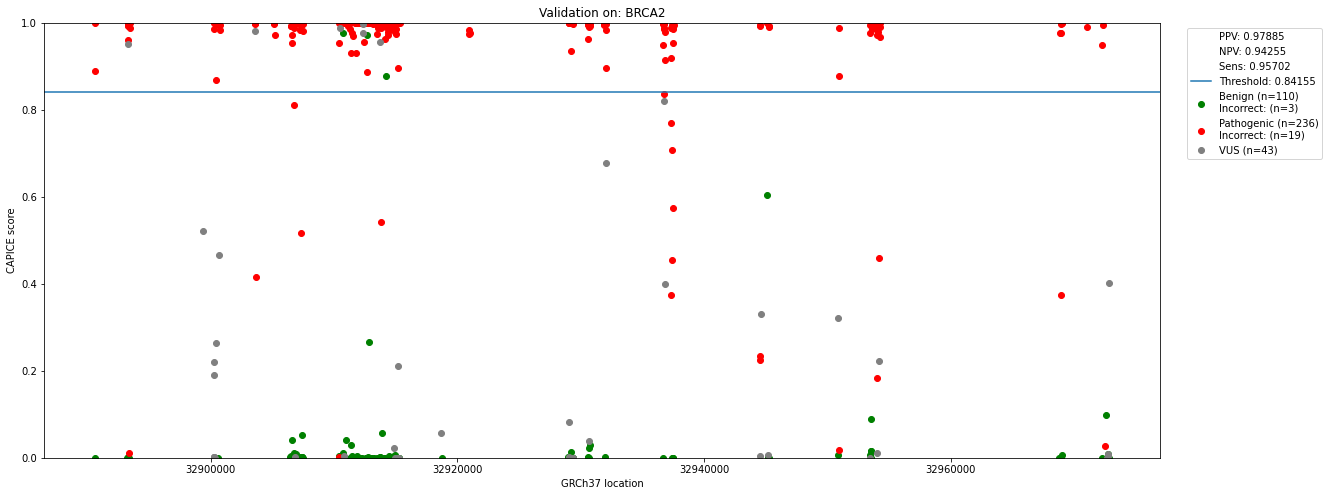

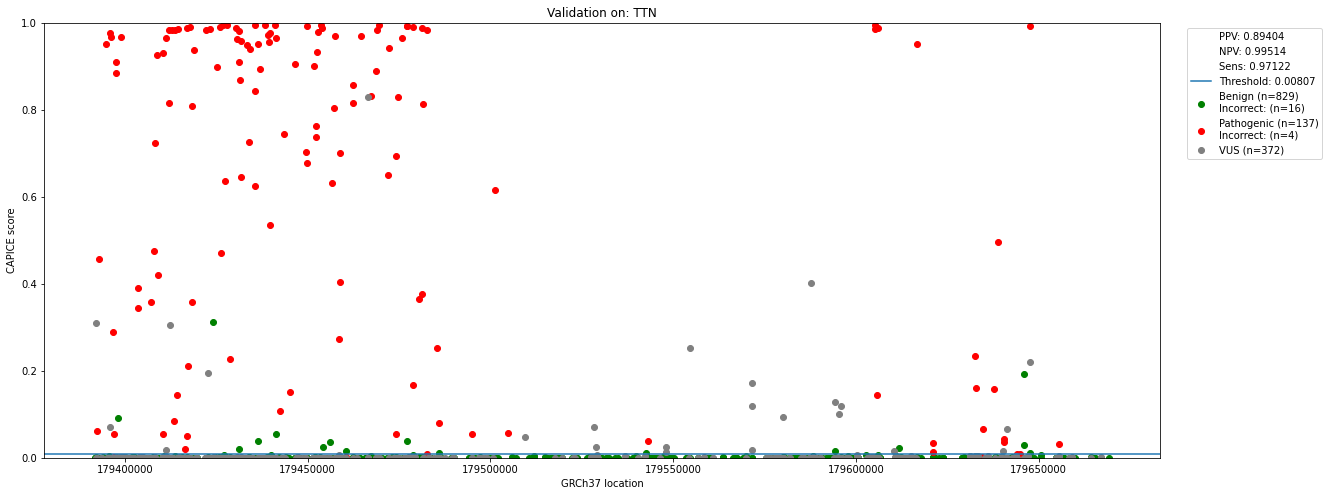

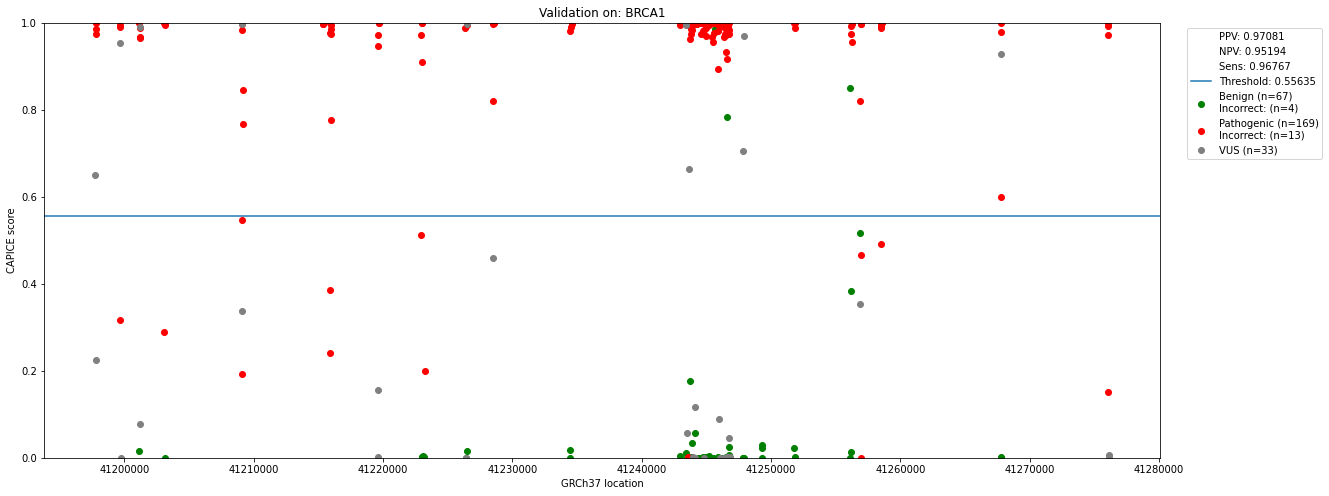

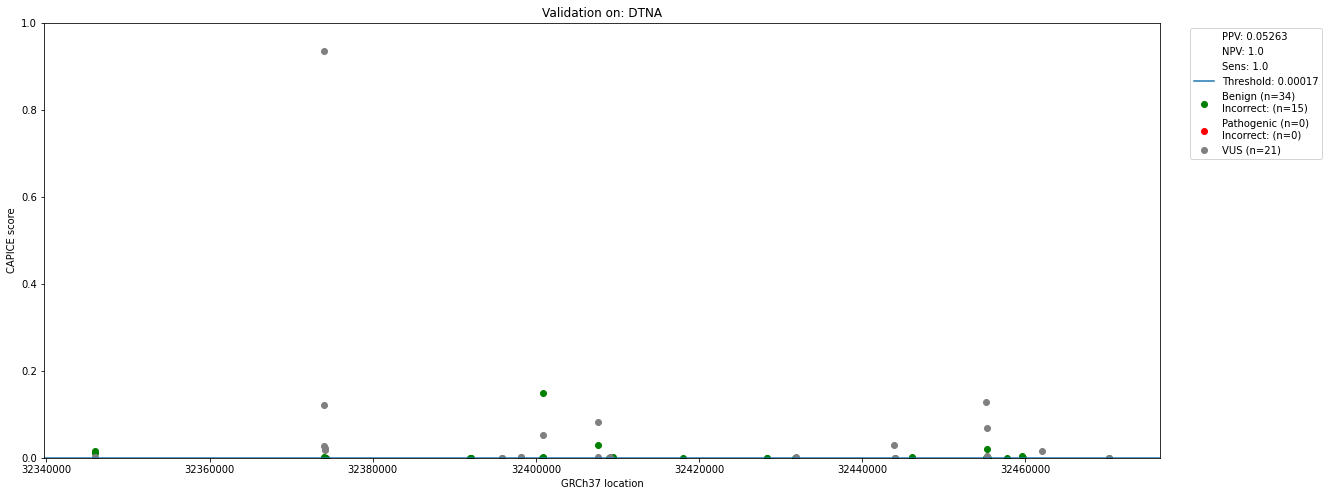

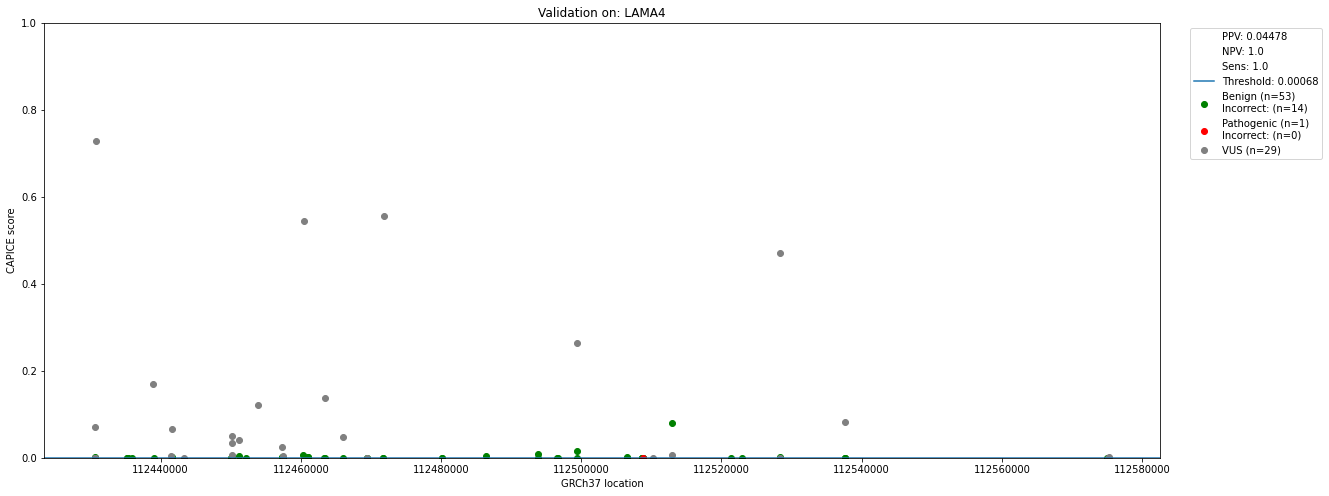

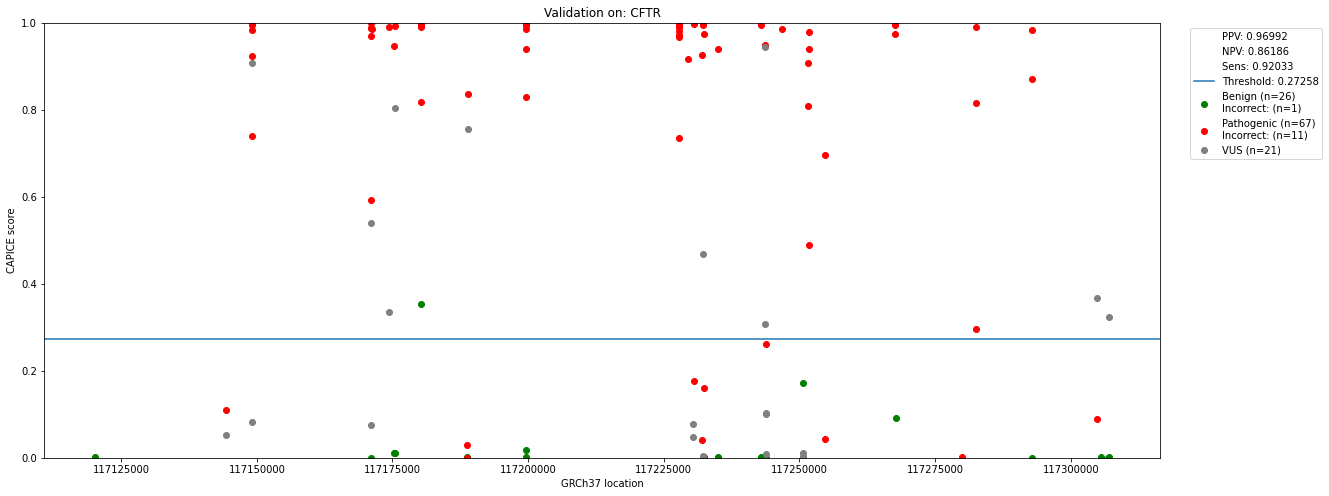

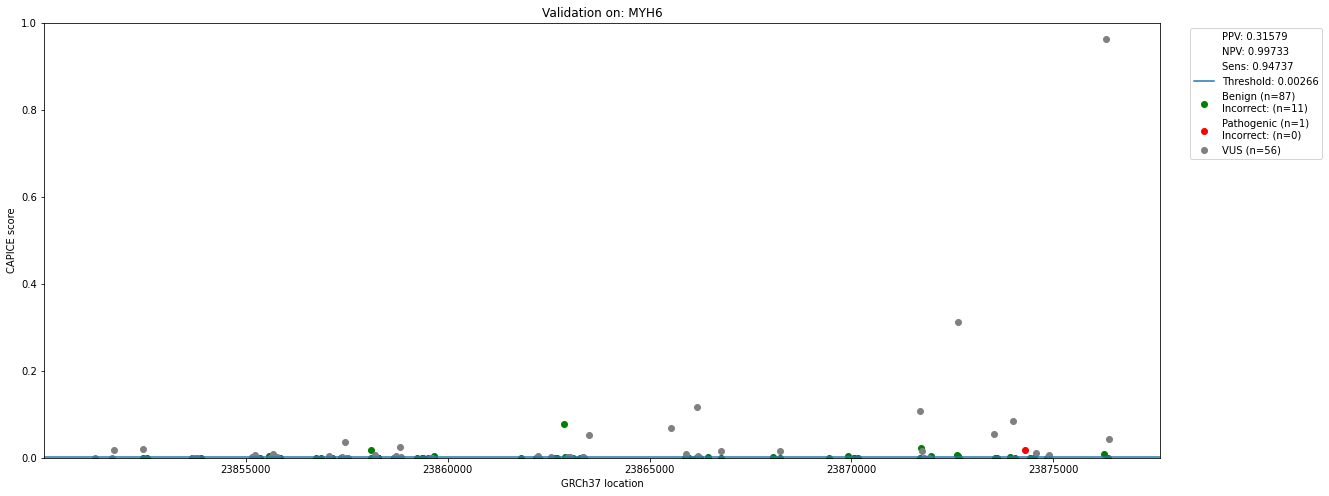

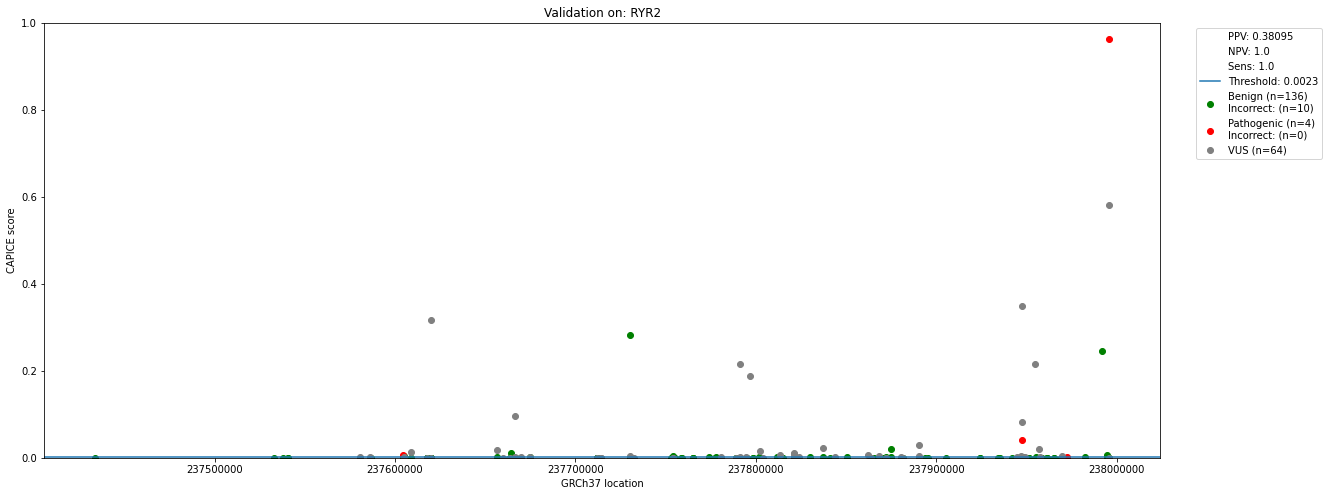

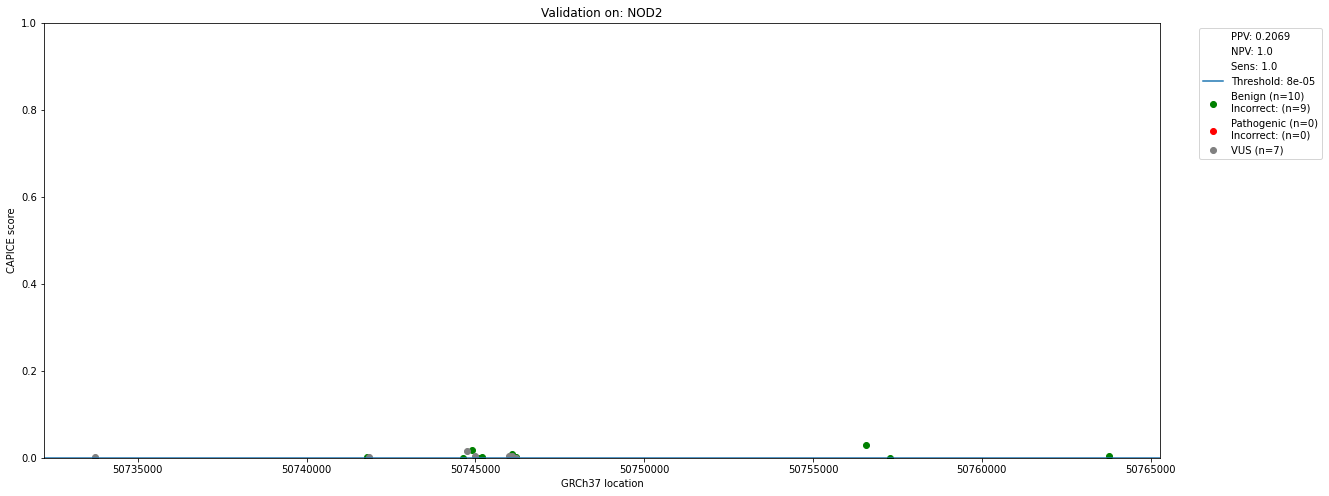

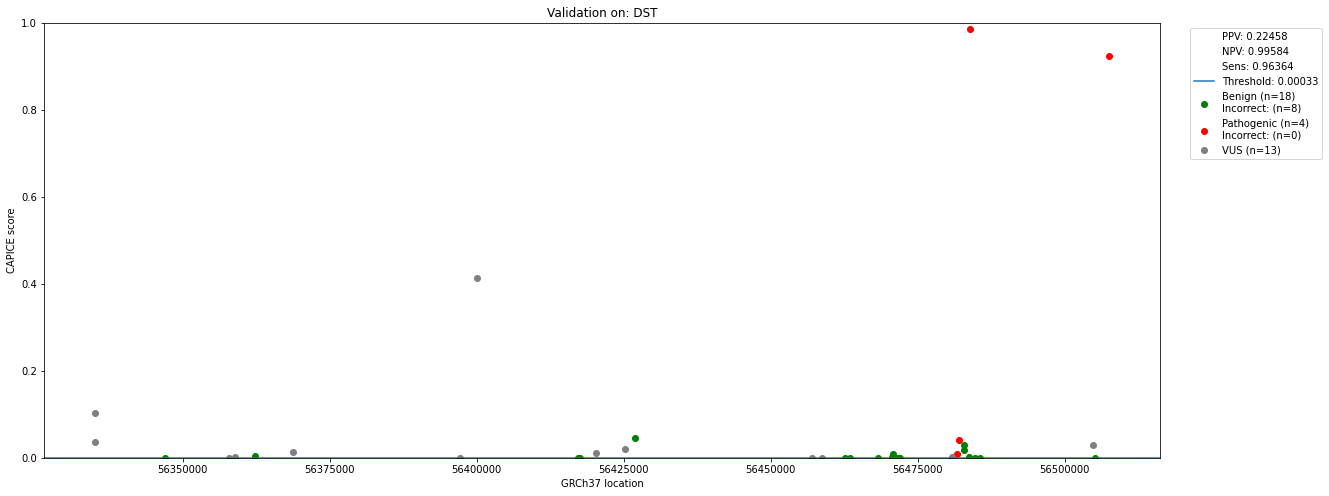

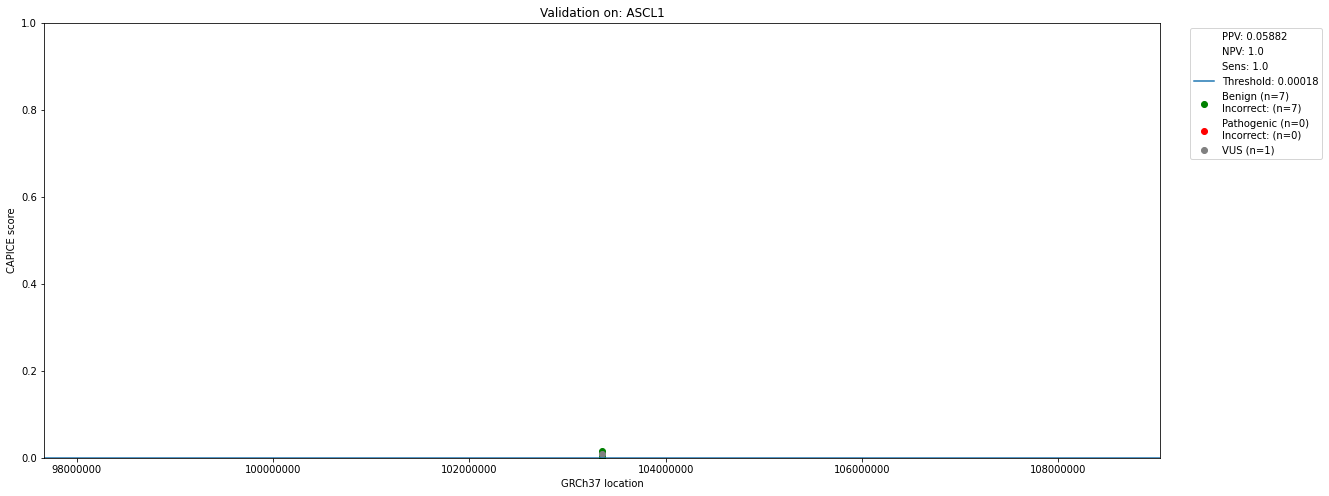

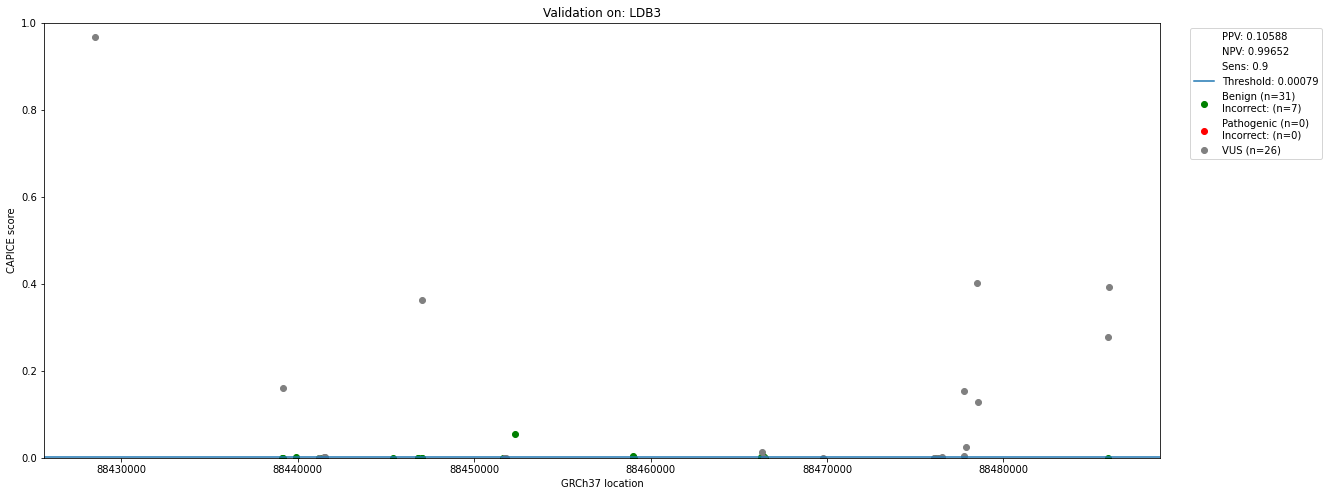

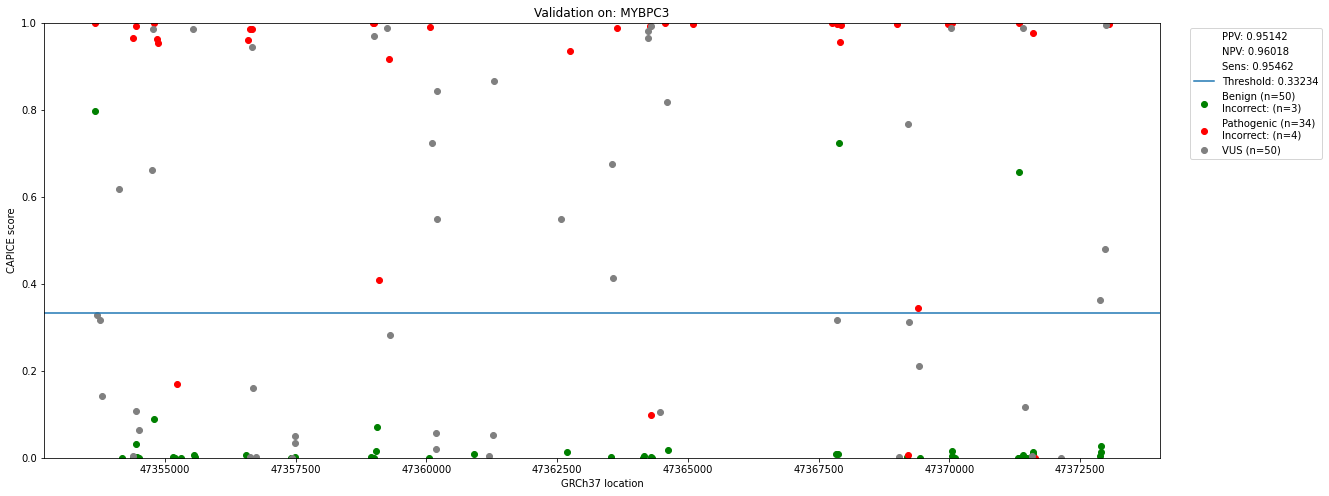

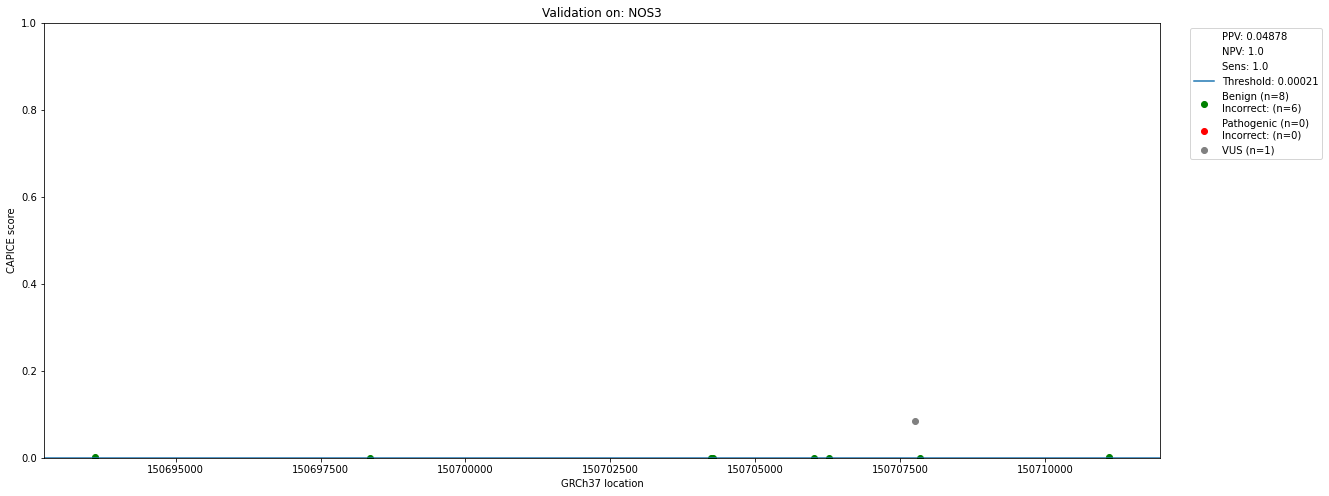

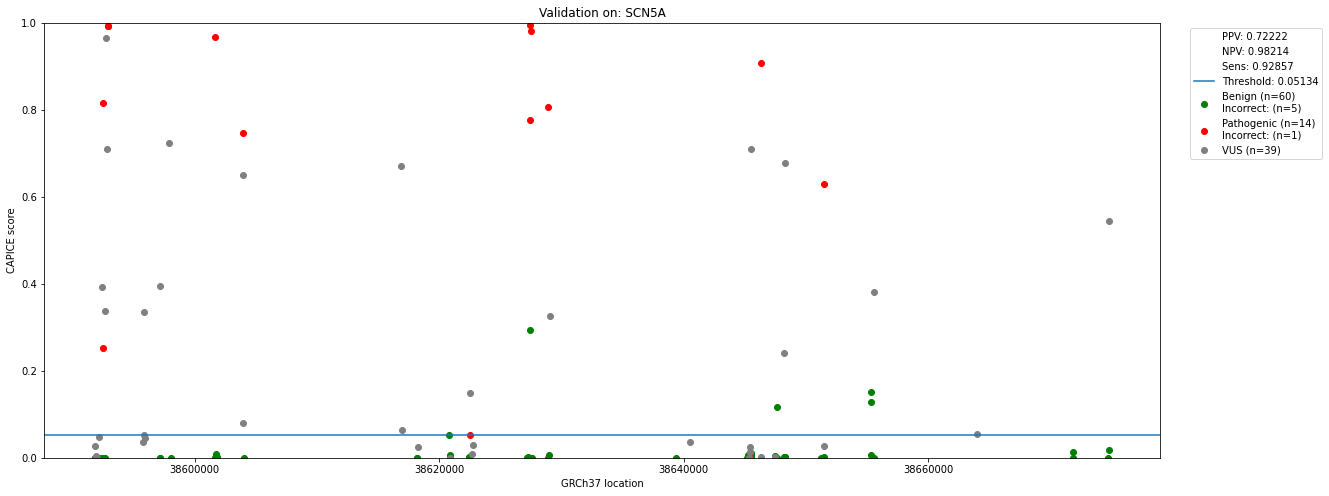

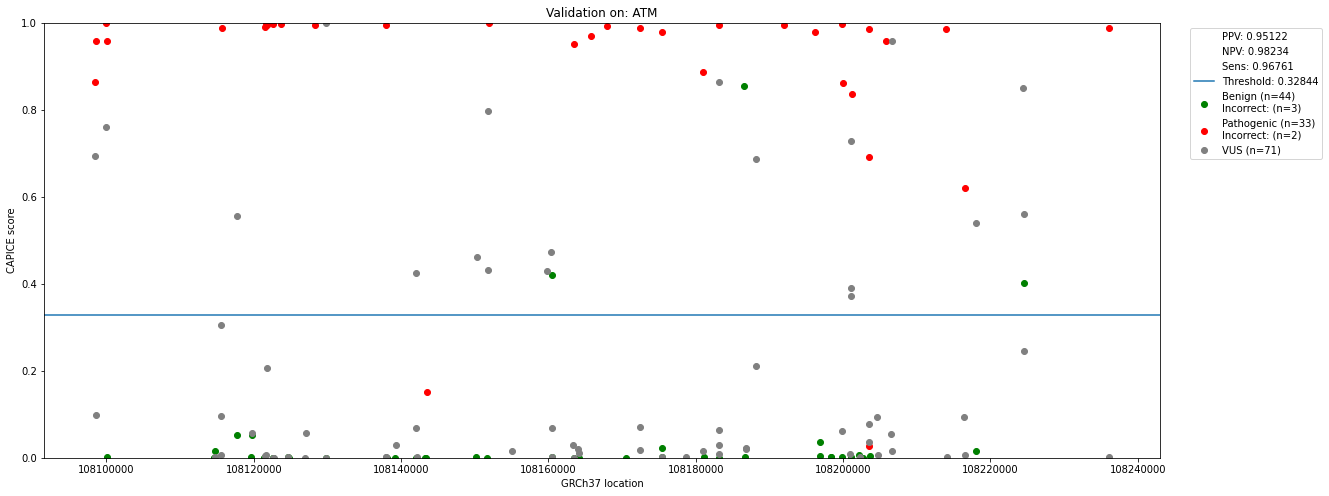

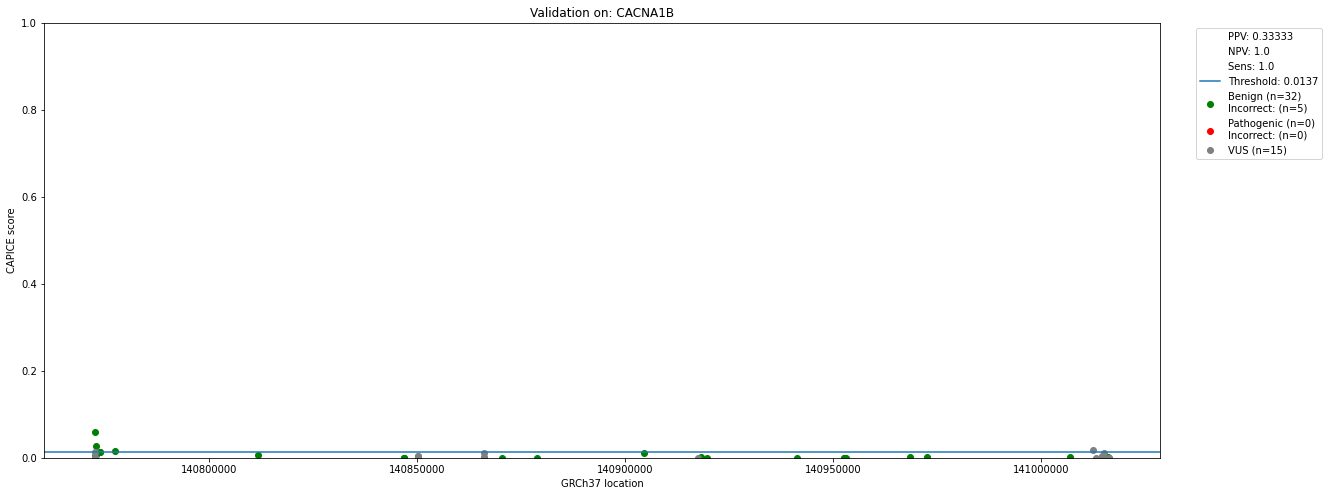

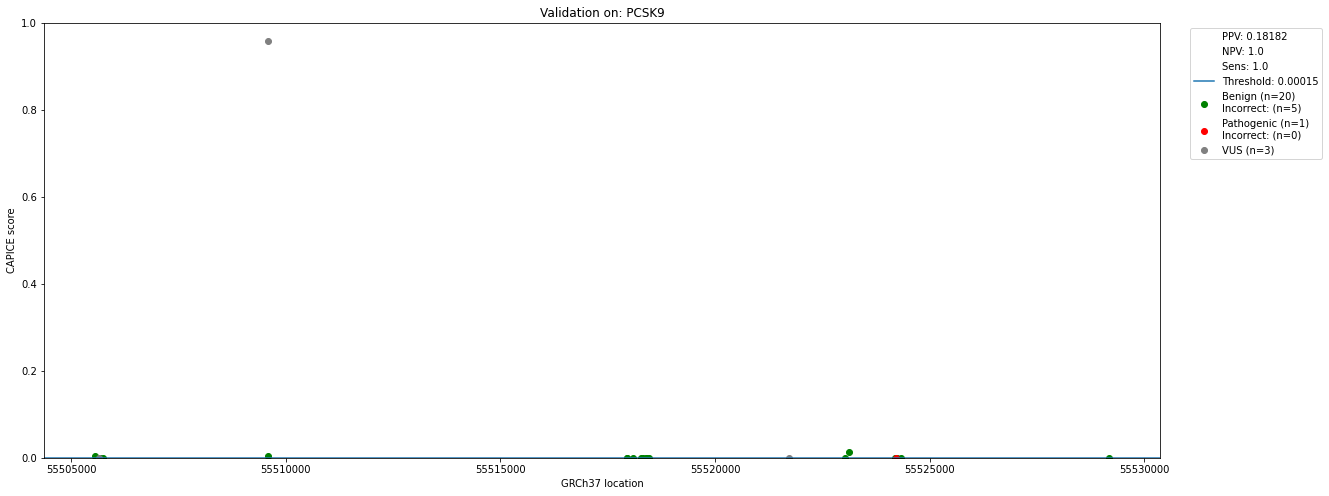

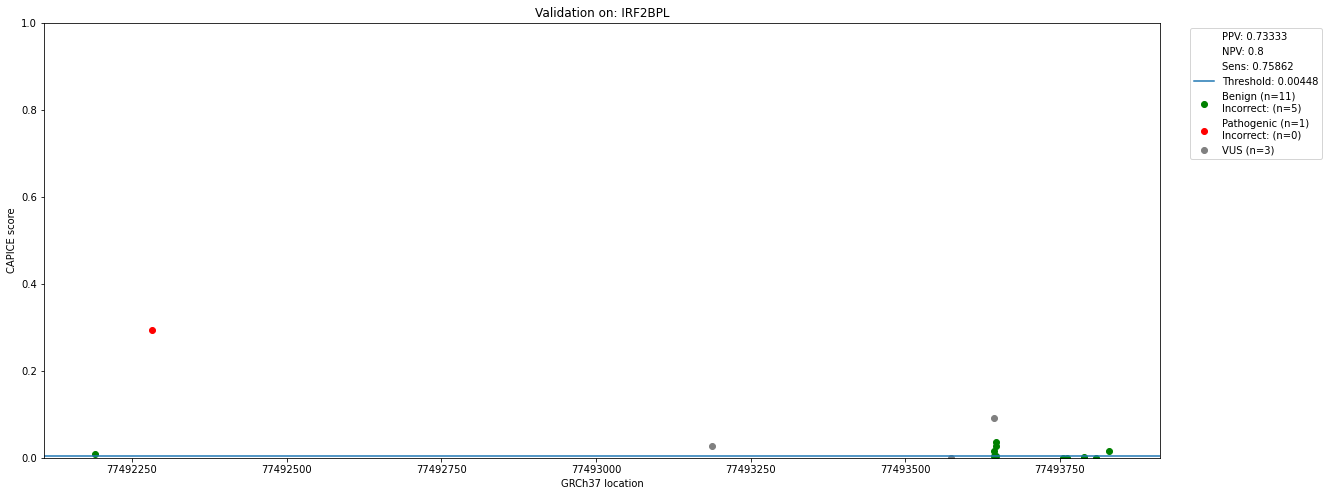

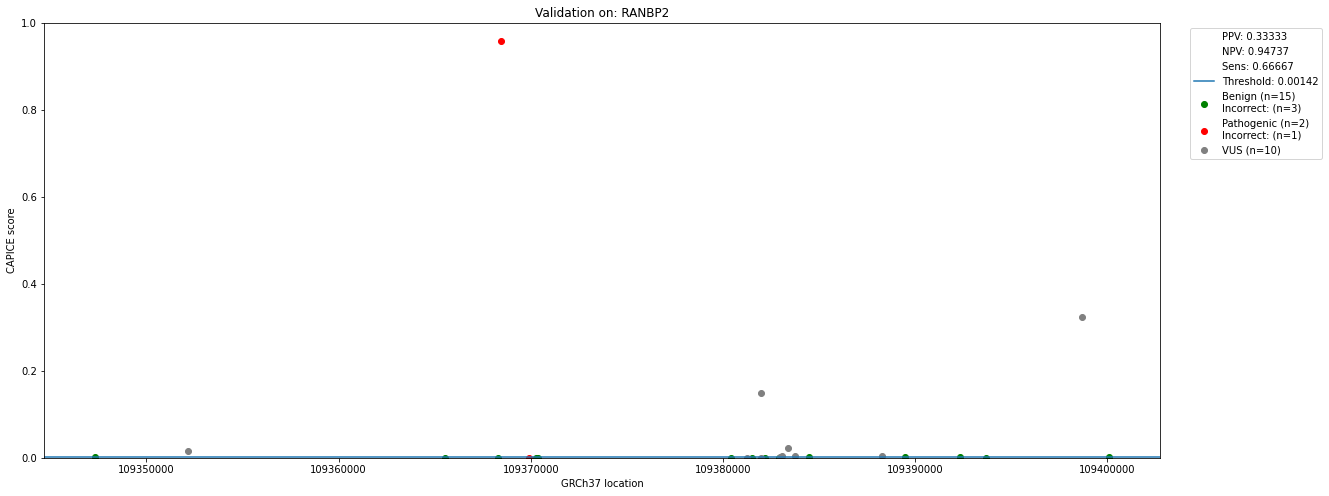

In [46]:
for gene in highest_genes:
    subset = mvl[mvl['GeneName'] == gene]
    ppv = thresholds.loc[thresholds[thresholds['gene'] == gene].index, 'ppv'].values[0]
    npv = thresholds.loc[thresholds[thresholds['gene'] == gene].index, 'npv'].values[0]
    sens = thresholds.loc[thresholds[thresholds['gene'] == gene].index, 'sensitivity'].values[0]
    fig, axes = plt.subplots(1,1,figsize=(20,8))
    axes.ticklabel_format(useOffset=False, style='plain')
    subset_benign = subset[(subset['binarized_label'] == 0.0) & (subset['sugg_class_binary'].notnull()) & (subset['binarized_label'].notnull())]
    subset_benign_wrong = subset[(subset['binarized_label'] == 0.0) & (subset['sugg_class_binary'] == 1.0) & (subset['sugg_class_binary'].notnull()) & (subset['binarized_label'].notnull())].shape[0]
    subset_pathogenic = subset[(subset['binarized_label'] == 1.0) & (subset['sugg_class_binary'].notnull()) & (subset['binarized_label'].notnull())]
    subset_pathogenic_wrong = subset[(subset['binarized_label'] == 1.0) & (subset['sugg_class_binary'] == 0.0) & (subset['sugg_class_binary'].notnull()) & (subset['binarized_label'].notnull())].shape[0]
    subset_vus = subset[subset['binarized_label'].isnull()]
    # subset_vus_benign = subset[(subset['sugg_class_binary'] == 0.0) & (subset['binarized_label'].isnull())]
    # subset_vus_pathogenic = subset[(subset['sugg_class_binary'] == 1.0) & (subset['binarized_label'].isnull())]
    threshold = thresholds[thresholds['gene'] == gene]['optimal_threshold'].values[0]
    axes.scatter(
        subset_benign['pos'],
        subset_benign['probabilities'],
        c='green',
        label=f'Benign (n={subset_benign.shape[0]})\nIncorrect: (n={subset_benign_wrong})'
    )
    axes.scatter(
        subset_pathogenic['pos'],
        subset_pathogenic['probabilities'],
        c='red',
        label=f'Pathogenic (n={subset_pathogenic.shape[0]})\nIncorrect: (n={subset_pathogenic_wrong})'
    )
    axes.scatter(
        subset_vus['pos'],
        subset_vus['probabilities'],
        c='grey',
        label=f'VUS (n={subset_vus.shape[0]})'
    )
    # axes.scatter(
    #     subset_vus_benign['pos'],
    #     subset_vus_benign['probabilities'],
    #     c='blue',
    #     label=f'Benign VUS (n={subset_vus_benign.shape[0]})'
    # )
    # axes.scatter(
    #     subset_vus_pathogenic['pos'],
    #     subset_vus_pathogenic['probabilities'],
    #     c='orange',
    #     label=f'Pathogenic VUS (n={subset_vus_pathogenic.shape[0]})'
    # )
    plt.plot([],[],c='none',label=f'PPV: {round(ppv, 5)}')
    plt.plot([],[],c='none',label=f'NPV: {round(npv, 5)}')
    plt.plot([],[],c='none',label=f'Sens: {round(sens, 5)}')
    axes.axhline(y=threshold, label=f'Threshold: {round(threshold, 5)}')
    handles, labels = axes.get_legend_handles_labels()
    lgd = axes.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.15,1.0))
    axes.set_title(f'Validation on: {gene}')
    axes.set_xlabel('GRCh37 location')
    axes.set_ylabel('CAPICE score')
    axes.set_ylim(0,1)
    plt.savefig(f'{export_location}/{gene}.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

In [47]:
mvl['variant_incorrect'] = np.nan
mvl.loc[mvl[(mvl['binarized_label'] != mvl['sugg_class_binary']) & (mvl['binarized_label'].notnull()) & (mvl['sugg_class_binary'].notnull())].index, 'variant_incorrect'] = 1
mvl.loc[mvl[(mvl['binarized_label'] == mvl['sugg_class_binary']) & (mvl['binarized_label'].notnull()) & (mvl['sugg_class_binary'].notnull())].index, 'variant_incorrect'] = 0
mvl

,GeneName,FeatureID,Consequence,probabilities,chr,pos,ref,alt,class,binarized_label,sugg_class,sugg_class_binary,gene_threshold,gene_incorrect,p_gene_incorrect,variant_incorrect
0,ISG15,ENST00000379389,STOP_GAINED,0.047104,1,949682,A,T,P,1.0,VUS,NaN,NaN,NaN,NaN,NaN
1,AGRN,ENST00000379370,SPLICE_SITE,0.000006,1,977330,T,C,B,0.0,VUS,NaN,NaN,NaN,NaN,NaN
2,AGRN,ENST00000379370,SYNONYMOUS,0.000001,1,981931,A,G,B,0.0,VUS,NaN,NaN,NaN,NaN,NaN
3,AGRN,ENST00000379370,INTRONIC,0.000005,1,982941,T,C,B,0.0,VUS,NaN,NaN,NaN,NaN,NaN
4,AGRN,ENST00000379370,SYNONYMOUS,0.000153,1,982994,T,C,B,0.0,VUS,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20218,RAB39B,ENST00000369454,SYNONYMOUS,0.000022,X,154490187,T,C,LB,0.0,LB,0.0,0.155121,0.0,0.0,0.0
20219,CLIC2,ENST00000369449,NON_SYNONYMOUS,0.001572,X,154563706,C,T,VUS,NaN,LB,0.0,0.004735,0.0,0.0,NaN
20220,TMLHE,ENST00000334398,NON_SYNONYMOUS,0.000948,X,154736715,T,C,VUS,NaN,LB,0.0,0.066598,0.0,0.0,NaN
20221,TMLHE,ENST00000334398,NON_SYNONYMOUS,0.002784,X,154743837,T,A,LB,0.0,LB,0.0,0.066598,0.0,0.0,0.0


In [48]:
mvl[mvl['variant_incorrect'] == 1]['Consequence'].value_counts()

NON_SYNONYMOUS      356
SYNONYMOUS          188
SPLICE_SITE          69
INFRAME              66
INTRONIC             41
STOP_GAINED          37
CANONICAL_SPLICE     11
FRAME_SHIFT          10
DOWNSTREAM            3
3PRIME_UTR            3
UPSTREAM              2
NONCODING_CHANGE      2
5PRIME_UTR            2
Name: Consequence, dtype: int64

In [49]:
mvl[mvl['variant_incorrect'] == 0]['Consequence'].value_counts()


NON_SYNONYMOUS      3953
SYNONYMOUS          3111
INTRONIC            1922
SPLICE_SITE          939
FRAME_SHIFT          790
STOP_GAINED          604
CANONICAL_SPLICE     287
INFRAME              245
3PRIME_UTR           126
5PRIME_UTR            96
UPSTREAM              19
DOWNSTREAM            12
NONCODING_CHANGE       9
UNKNOWN                1
Name: Consequence, dtype: int64

In [50]:
mvl.to_csv('/home/rjsietsma/PycharmProjects/capice_updatr/datafiles/Thresholds/mvl_list_expanded_statistics_v2.csv.gz', compression='gzip', index=False)

In [51]:
mvl[mvl['variant_incorrect'] > 0]['GeneName'].unique().size

453